In [1]:
# !nvidia-smi

In [2]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\tracking


In [3]:
# !pip install -q inference-gpu[yolo-world]==0.9.12rc1

In [4]:
# !pip install -q supervision==0.19.0rc3

In [5]:
import cv2
import supervision as sv

from tqdm import tqdm
from inference.models.yolo_world.yolo_world import YOLOWorld

[06/30/24 22:40:06] WARNING  Your inference package version 0.9.12rc1 is out of date! Please upgrade ]8;id=522103;file://C:\Users\temir\AppData\Local\pypoetry\Cache\virtualenvs\boxmot-YYdalq4K-py3.10\lib\site-packages\inference\core\__init__.py\__init__.py]8;;\:]8;id=616111;file://C:\Users\temir\AppData\Local\pypoetry\Cache\virtualenvs\boxmot-YYdalq4K-py3.10\lib\site-packages\inference\core\__init__.py#35\35]8;;\
                             to version 0.13.0 of inference for the latest features and bug fixes by               
                             running `pip install --upgrade inference`.                                            

In [6]:
SOURCE_VIDEO_PATH = fr"C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\assets\clips\mob12_comp.mp4"#f"{HOME}/mob12_comp.mp4"

In [7]:
print(SOURCE_VIDEO_PATH)

C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\assets\clips\mob12_comp.mp4


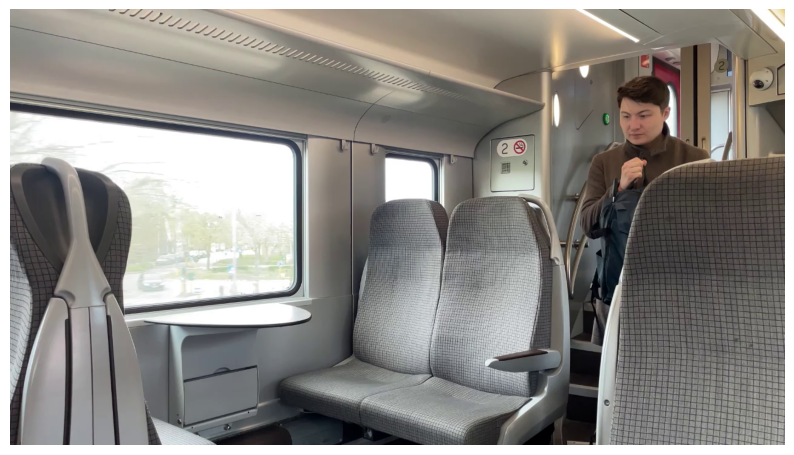

In [8]:
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(generator)

sv.plot_image(frame, (10, 10))

In [13]:
model = YOLOWorld(model_id="yolo_world/l")
classes = ["person","backpack","handbag","suitcase"]
model.set_classes(classes)
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

In [14]:
results = model.infer(frame, confidence=0.002)
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)

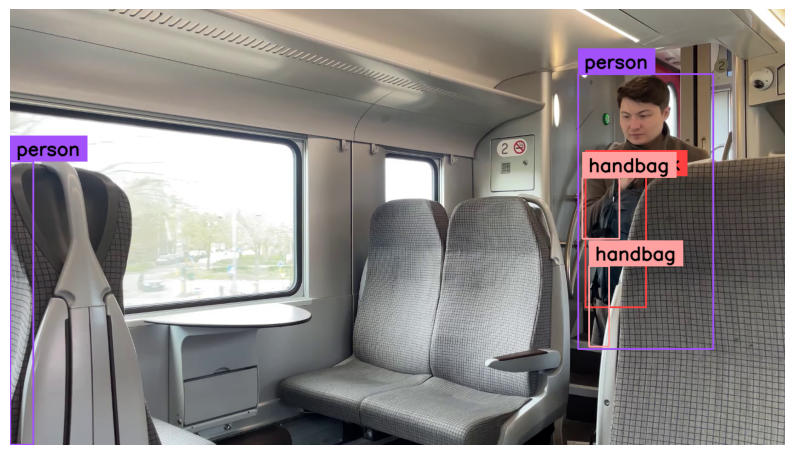

In [15]:
annotated_image = frame.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

In [16]:
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_info

VideoInfo(width=1280, height=720, fps=25, total_frames=1954)

In [17]:
width, height = video_info.resolution_wh
frame_area = width * height
frame_area

921600

In [18]:
results = model.infer(frame, confidence=0.002)
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)
detections.area

array([ 1.0131e+05,       21791,      6136.4,      4418.3,       17843])

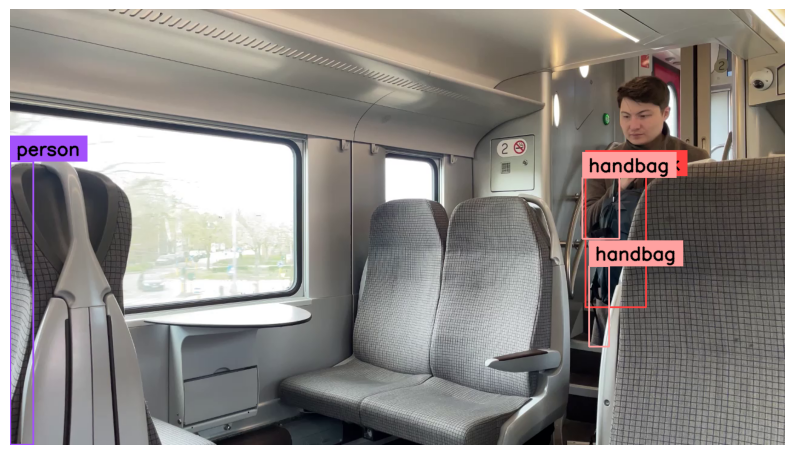

In [19]:
detections = detections[(detections.area / frame_area) < 0.10]

annotated_image = frame.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

In [20]:
TARGET_VIDEO_PATH = f"{HOME}/video_output.mp4"

In [21]:
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

width, height = video_info.resolution_wh
frame_area = width * height
frame_area

with sv.VideoSink(target_path=TARGET_VIDEO_PATH, video_info=video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        results = model.infer(frame, confidence=0.002)
        detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)
        # detections = detections[(detections.area / frame_area) < 0.10]

        annotated_frame = frame.copy()
        annotated_frame = BOUNDING_BOX_ANNOTATOR.annotate(annotated_frame, detections)
        annotated_frame = LABEL_ANNOTATOR.annotate(annotated_frame, detections)
        sink.write_frame(annotated_frame)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1953/1954 [12:56<00:00,  2.51it/s]


In [1]:
import cv2

# Path to the video file
video_path = r"C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\COCO_AND_CUSTOM\track_9505\tracking_results\9505_30fr_cut.mp4"

# Open the video file
video = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Print the total number of frames
print("Total frames:", total_frames)

# Release the video file
video.release()

Total frames: 628


In [1]:
2+2

4

In [8]:
!pip install json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [4]:
import json
import cv2
import matplotlib.pyplot as plt

# # Path to the COCO labels JSON file
# labels_file = r"C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\coco_subset\annotations\000000006253.json"

# # Path to the image file
# image_file = r"C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\coco_subset\images\000000006253.jpg"

# Path to the COCO labels JSON file
labels_file = r"C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\COCO_AND_CUSTOM\coco_yolo\labels\000000001144.txt"

# Path to the image file
image_file = r"C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\COCO_AND_CUSTOM\coco_yolo\images\000000001144.jpg"


# Load the image
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the annotations
with open(labels_file, 'r') as f:
    annotations = json.load(f)

# Plot the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Draw the bounding boxes
for annotation in annotations:
    bbox = annotation['bbox']
    x, y, width, height = bbox
    rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()


JSONDecodeError: Extra data: line 1 column 3 (char 2)

Annotation - Class ID: 0.0, x_min: 124.63440000000001, y_min: 0.0, width: 72.80544, height: 378.15984000000003
Annotation - Class ID: 2.0, x_min: 140.21952000000002, y_min: 208.86983999999998, width: 22.775039999999997, height: 30.3102


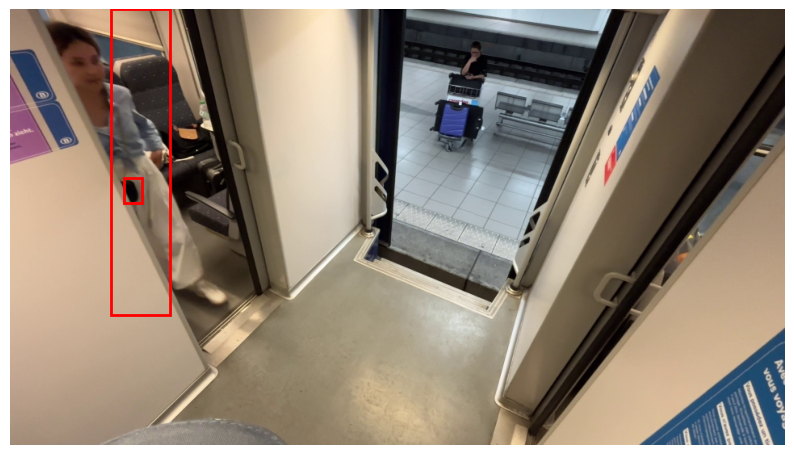

In [14]:
import cv2
import matplotlib.pyplot as plt

# Path to the YOLO labels text file
labels_file = r"C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\COCO_AND_CUSTOM\yolo\test_data_output\frame_005169.txt"

# Path to the image file
image_file = r"C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\COCO_AND_CUSTOM\yolo\test_data_output\frame_005169.PNG"

# Load the image
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image dimensions
image_height, image_width, _ = image.shape

# Load the YOLO annotations
annotations = []
with open(labels_file, 'r') as f:
    for line in f.readlines():
        # YOLO format is: class_id x_center y_center width height
        parts = line.strip().split()
        if len(parts) != 5:
            print(f"Skipping invalid annotation: {line.strip()}")
            continue
        class_id, x_center, y_center, width, height = map(float, parts)
        
        # Convert YOLO format to pixel values
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height
        x_min = x_center - width / 2
        y_min = y_center - height / 2

        annotations.append((x_min, y_min, width, height))

        # Debugging: Print out the calculated bounding box
        print(f"Annotation - Class ID: {class_id}, x_min: {x_min}, y_min: {y_min}, width: {width}, height: {height}")

# Plot the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Draw the bounding boxes
for bbox in annotations:
    x_min, y_min, width, height = bbox
    rect = plt.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()



In [9]:
# Class ID counts:
# Class 0: 6495 occurrences
# Class 1: 9091 occurrences
# Class 2: 12894 occurrences

# Class ID counts:
# Class 1: 9091 occurrences Backpack
# Class 2: 12894 occurrences Handbag
# Class 3: 6495 occurrences Suitcase

# This script uses a dictionary remap_first_dataset to re-map the class IDs in the first dataset:
# 0 (Suitcase) → 3
# 1 (Backpack) → 1
# 2 (Handbag) → 2

In [10]:
import os
from collections import defaultdict

# Define the path to the directory containing YOLO label files
labels_dir = r'C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\COCO_AND_CUSTOM\coco_yolo\labels'

# Initialize a dictionary to store counts of each class ID
class_counts = defaultdict(int)

# Iterate through all files in the labels directory
for filename in os.listdir(labels_dir):
    if filename.endswith('.txt'):
        # Open each label file
        with open(os.path.join(labels_dir, filename), 'r') as f:
            for line in f:
                # Extract the class ID (the first element in each line)
                class_id = int(line.split()[0])
                # Increment the count for this class ID
                class_counts[class_id] += 1

# Print out the class counts
print("Class ID counts:")
for class_id, count in sorted(class_counts.items()):
    print(f"Class {class_id}: {count} occurrences")


Class ID counts:
Class 1: 9091 occurrences
Class 2: 12894 occurrences
Class 3: 6495 occurrences


In [8]:
import json
from collections import defaultdict

# Paths to the COCO annotation JSON files
json_files = [
    r'C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\COCO_AND_CUSTOM\coco_subset\anno-jsons\annotations\instances_train2017.json',
    r'C:\Users\temir\Documents\KULcourses\Thesis_CV\code_yolo8_base\y8\yolo_tracking\COCO_AND_CUSTOM\coco_subset\anno-jsons\annotations\instances_val2017.json'
]

# Categories of interest
categories_of_interest = [27, 31, 33]  # 27: backpack, 31: handbag, 33: suitcase

# Initialize a dictionary to store counts of each class ID
class_counts = defaultdict(int)

# Iterate through all JSON files
for json_file in json_files:
    # Load the JSON data
    with open(json_file, 'r') as f:
        data = json.load(f)
        
    # Iterate over each annotation in the JSON file
    for annotation in data['annotations']:
        category_id = annotation['category_id']
        if category_id in categories_of_interest:
            # Increment the count for this category ID
            class_counts[category_id] += 1

# Print out the class counts
print("Class ID counts:")
for class_id, count in sorted(class_counts.items()):
    if class_id == 27:
        class_name = "backpack"
    elif class_id == 31:
        class_name = "handbag"
    elif class_id == 33:
        class_name = "suitcase"
    print(f"{class_name.capitalize()} (Class {class_id}): {count} occurrences")


Class ID counts:
Backpack (Class 27): 9091 occurrences
Handbag (Class 31): 12894 occurrences
Suitcase (Class 33): 6495 occurrences
